In [46]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd


In [47]:
dataset=pd.read_csv("Salary_Data.csv")


In [48]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [49]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [50]:
x=dataset.iloc[:,[0]].values
y=dataset.iloc[:,[1]].values


In [51]:
# normalising the dataset
a=x.mean()

In [52]:
b=x.std()

In [53]:
x=(x-a)/b

# visualising data

In [54]:
import seaborn as sns
sns.set()

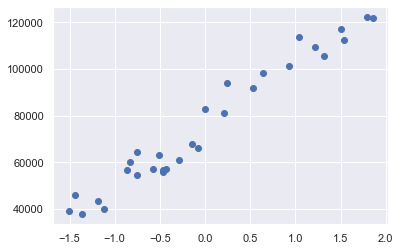

In [55]:
plt.scatter(x,y)
plt.show()

# algorithm for best fit line

In [56]:
# a function hypothesis to define the model
def hypothesis(theta,x):
    y_pred=theta[1]*x+theta[0]
    return y_pred

In [57]:
def gradient_calculator(x,y,theta,m=x.shape[0]):
    grad=np.zeros((2,))
    for i in range(m):
        # predicting one value of y
        y_pred=hypothesis(theta,x[i])
        grad[0]+=y_pred-y[i]
        grad[1]+=x[i]*(y_pred-y[i])
    
    return grad/m

In [58]:

def gradient_descent(x,y,max_steps=50,lr=0.1):
    theta=np.zeros((2,))
    error_list=[]
    for i in range(max_steps):
        # calculate grad
        grad=gradient_calculator(x,y,theta)
        err=error(theta,x,y)
        error_list.append(err)
        #  update theta
        theta[0]=theta[0]-lr*grad[0]
        theta[1]=theta[1]-lr*grad[1]
    return theta,error_list
def error(theta,x,y,m=y.shape[0]):
    e=0
    for i in range(m):
        y_pred=hypothesis(theta,x[i])
        e+=(y_pred-y)**2
    e=e/m
    # mean squared error is returned
    return e

In [59]:
theta,error_list=gradient_descent(x,y)

In [60]:
theta

array([75611.29762292, 26231.29191238])

In [61]:
error_list=np.reshape(error_list,(-1,1))

In [62]:
a=np.arange(1500)
a.shape

(1500,)

In [63]:
error_list.shape

(1500, 1)

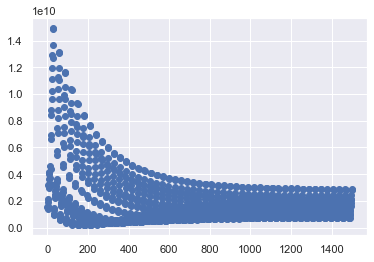

In [64]:

plt.scatter(a,error_list)
plt.show()

# prediction and best line

In [65]:
y_pred=hypothesis(theta,x)

In [66]:
y_pred.shape

(30, 1)

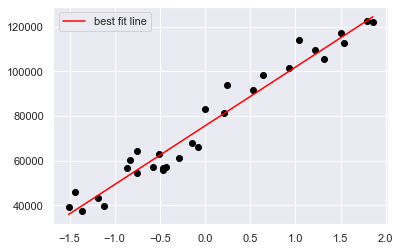

In [67]:
# original dataset points
plt.scatter(x,y,color='black')
# best fit line using the y_pred values
plt.plot(x,y_pred,color='red',label="best fit line")
plt.legend()
plt.show()


In [68]:
# to get the slope we have theta1 and for intercept we have theta0
theta[0]

75611.29762291806

In [69]:
theta[1]

26231.29191237802

# getting the accuracy via R2 score


In [70]:
def r2_score(y_pred,y,m=y.shape[0]):
    r2=np.zeros((2,))  # r2[0]=numr and r2[1] is denr
    a=y.mean()
    # method-1
    
    # for i in range(m):
    #     r2[0]+=(y[i]-y_pred[i])**2
    #     r2[1]+=(y[i]-a)**2

    # method-2
    r2[0]=np.sum((y_pred-y)**2)
    r2[1]=np.sum((y-a)**2)
    score=1-(r2[0]/r2[1])
    return score    


In [71]:
r2_score(y_pred=y_pred,y=y)



0.9567200541457755

In [72]:
accuracy=(r2_score(y_pred=y_pred,y=y))*100
print(str(accuracy)+"%")

95.67200541457755%


# visualising loss function,Gradient Descent,Theta

In [73]:
theta

array([75611.29762292, 26231.29191238])

In [74]:
# loss function
# we will take the surface around the theta coordinate
# we can generate that using meshgrid function
# x0=coordinate around the theta0 i.e the intercept
x0 =np.arange(690,800,1)
# y1 will be the coordinate around the theta1 i.e the slope for our best fit line
y1=np.arange(26200,26290,1)

x0,y1=np.meshgrid(x0,y1)

In [75]:
x0

array([[690, 691, 692, ..., 797, 798, 799],
       [690, 691, 692, ..., 797, 798, 799],
       [690, 691, 692, ..., 797, 798, 799],
       ...,
       [690, 691, 692, ..., 797, 798, 799],
       [690, 691, 692, ..., 797, 798, 799],
       [690, 691, 692, ..., 797, 798, 799]])

In [76]:
y1

array([[26200, 26200, 26200, ..., 26200, 26200, 26200],
       [26201, 26201, 26201, ..., 26201, 26201, 26201],
       [26202, 26202, 26202, ..., 26202, 26202, 26202],
       ...,
       [26287, 26287, 26287, ..., 26287, 26287, 26287],
       [26288, 26288, 26288, ..., 26288, 26288, 26288],
       [26289, 26289, 26289, ..., 26289, 26289, 26289]])

In [105]:
# loss function(j)will be the matrix that store the all possible value of theta and we will use gradient descent  to find the minimum theta there
j=
a=j.shape[0]
b=j.shape[1]
for i in range(a):
    for j in range(b):
        y_pred=y1[i,j]*x + x0[i,j]
        c=np.sum((y_pred-y)**2)
        j[i][j]=c
        
# print(j[3][3])

TypeError: 'int' object is not subscriptable

In [ ]:
graph=plt.figure()
axis=graph.gca(projection='3d')
